# K-Means Clustering

Conventional k-means requires only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.

The main element of the algorithm works by a two-step process called expectation-maximization. The expectation step assigns each data point to its nearest centroid. Then, the maximization step computes the mean of all the points for each cluster and sets the new centroid.

The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

After choosing a number of clusters and the initial centroids, the expectation-maximization step is repeated until the centroid positions reach convergence and are unchanged.

The random initialization step causes the k-means algorithm to be nondeterministic, meaning that cluster assignments will vary if you run the same algorithm twice on the same dataset. Researchers commonly run several initializations of the entire k-means algorithm and choose the cluster assignments from the initialization with the lowest SSE. 

In [158]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px


pd.set_option('display.max_columns', None) # display all columns
pd.set_option("max_colwidth", 40) # sets a maximum column width
pd.set_option("display.precision", 7) # sets the number of decimals shown
# pd.set_option("styler.format.precision", 3) # rounds floats




In [159]:
data_pca = pd.read_csv('../data/country-data-pca.csv')
data_raw = pd.read_csv('../data/country-data.csv')

In [160]:
countries = data_pca.country
data_pca.drop(columns=["country"], inplace=True)
columns = data_pca.columns
scaler = MinMaxScaler()
scaled_data_pca = scaler.fit_transform(data_pca) # numpy array
data_pca = pd.DataFrame(scaled_data_pca, columns=columns)
data_pca.index = countries
data_pca

,PC1,PC2,PC3,PC4
country,,,,
Afghanistan,0.1334934,0.2950945,0.5689043,0.3967656
Albania,0.5596398,0.0647848,0.4027531,0.3664304
Algeria,0.4725663,0.1218602,0.3503075,0.5265294
Angola,0.1047158,0.4302371,0.3439456,0.5449733
Antigua and Barbuda,0.5833994,0.1751767,0.3753839,0.3856147
...,...,...,...,...
Vanuatu,0.3804441,0.2014118,0.3595033,0.3624427
Venezuela,0.5048824,0.0952998,0.4069514,0.6201173
Vietnam,0.5354723,0.1996080,0.3045547,0.2261156


In [161]:
countries = data_raw.country
data_raw.drop(columns=["country"], inplace=True)
columns = data_raw.columns
scaler = MinMaxScaler()
scaled_data_raw = scaler.fit_transform(data_raw) # numpy array
data_raw = pd.DataFrame(scaled_data_raw, columns=columns)
data_raw.index = countries
data_raw

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,0.4264849,0.0494820,0.3586078,0.2577649,0.0080472,0.1261436,0.4753452,0.7365931,0.0030734
Albania,0.0681597,0.1395310,0.2945929,0.2790373,0.0749331,0.0803992,0.8717949,0.0788644,0.0368334
Algeria,0.1202532,0.1915594,0.1466750,0.1801493,0.0988094,0.1876906,0.8757396,0.2744479,0.0403650
Angola,0.5666991,0.3111246,0.0646364,0.2462663,0.0425352,0.2459107,0.5522682,0.7902208,0.0314883
Antigua and Barbuda,0.0374878,0.2270788,0.2622747,0.3382551,0.1486522,0.0522133,0.8816568,0.1545741,0.1142418
...,...,...,...,...,...,...,...,...,...
Vanuatu,0.1295034,0.2325818,0.2137974,0.3026094,0.0188197,0.0631180,0.6094675,0.3706625,0.0261432
Venezuela,0.0705940,0.1420324,0.1926663,0.1008089,0.1277504,0.4630810,0.8540434,0.2082019,0.1266501
Vietnam,0.1007790,0.3596510,0.3126165,0.4607153,0.0312000,0.1507254,0.8086785,0.1261830,0.0102988


init - controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init "random". Setting this to "k-means++" employs an advanced trick to speed up convergence.

n_clusters - sets k for the clustering step. This is the most important parameter for k-means.

n_init - sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

max_iter - sets the number of maximum iterations for each initialization of the k-means algorithm.


# Choosing the Appropriate Number of Clusters

## Data_raw

c:\Users\sutov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


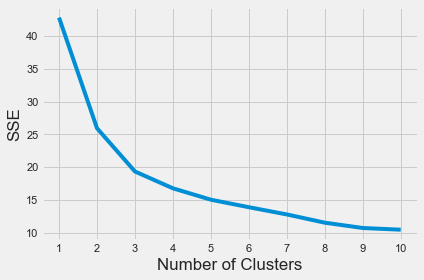

In [162]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_raw)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [163]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300)

kmeans.fit(data_raw)
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit():

In [164]:
# The lowest SSE value
kmeans.inertia_

19.345118591450646

In [165]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[0.09652182, 0.20147696, 0.27380866, 0.26944838, 0.09777085,
        0.10922302, 0.79847255, 0.18032426, 0.06193426],
       [0.44150332, 0.14597042, 0.28144675, 0.24855348, 0.02337632,
        0.15069832, 0.5383329 , 0.62148539, 0.01398231],
       [0.01118375, 0.29177116, 0.44172956, 0.29575955, 0.36332096,
        0.0623325 , 0.94961961, 0.0932402 , 0.40934   ]])

In [166]:
# The number of iterations required to converge
kmeans.n_iter_

8

In [167]:
#append cluster assingments to original data
data_raw['cluster_raw'] = kmeans.labels_

#view updated data
print(data_raw)

                     child_mort    exports     health    imports     income  \
country                                                                       
Afghanistan           0.4264849  0.0494820  0.3586078  0.2577649  0.0080472   
Albania               0.0681597  0.1395310  0.2945929  0.2790373  0.0749331   
Algeria               0.1202532  0.1915594  0.1466750  0.1801493  0.0988094   
Angola                0.5666991  0.3111246  0.0646364  0.2462663  0.0425352   
Antigua and Barbuda   0.0374878  0.2270788  0.2622747  0.3382551  0.1486522   
...                         ...        ...        ...        ...        ...   
Vanuatu               0.1295034  0.2325818  0.2137974  0.3026094  0.0188197   
Venezuela             0.0705940  0.1420324  0.1926663  0.1008089  0.1277504   
Vietnam               0.1007790  0.3596510  0.3126165  0.4607153  0.0312000   
Yemen                 0.2614411  0.1495365  0.2094469  0.1973972  0.0311196   
Zambia                0.3919182  0.1845556  0.253573

In [168]:
data_raw[data_raw.cluster_raw==1]
# data_raw[data_raw.cluster==1]
# data_raw[data_raw.cluster==2]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_raw
country,,,,,,,,,,
Afghanistan,0.4264849,0.0494820,0.3586078,0.2577649,0.0080472,0.1261436,0.4753452,0.7365931,0.0030734,1
Angola,0.5666991,0.3111246,0.0646364,0.2462663,0.0425352,0.2459107,0.5522682,0.7902208,0.0314883,1
Benin,0.5277507,0.1185196,0.1423244,0.2134952,0.0097354,0.0470844,0.5857988,0.6640379,0.0050301,1
Burkina Faso,0.5520935,0.0955071,0.3064015,0.1698005,0.0066002,0.1018390,0.5088757,0.7444795,0.0032834,1
Burundi,0.4430380,0.0440790,0.6084525,0.2249938,0.0012461,0.1525737,0.5049310,0.8059937,0.0000000,1
Cameroon,0.5131451,0.1105152,0.2063393,0.1548523,0.0164883,0.0565567,0.4970414,0.6246057,0.0102988,1
Central African Republic,0.7127556,0.0584869,0.1348664,0.1519777,0.0022429,0.0574808,0.3037475,0.6403785,0.0020521,1
Chad,0.7176241,0.1835550,0.1690491,0.2497158,0.0106197,0.0979577,0.4812623,0.8580442,0.0063568,1
Comoros,0.4167478,0.0819997,0.1678061,0.2968601,0.0064394,0.0746696,0.6666667,0.5678233,0.0051351,1


## DATA_PCA

c:\Users\sutov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


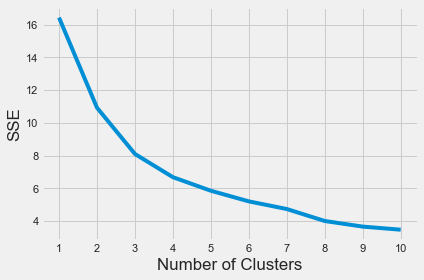

In [169]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [170]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300)

kmeans.fit(data_pca)
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [171]:
#append cluster assingments to original data
data_pca['cluster_pca'] = kmeans.labels_

#view updated data
print(data_pca)

                           PC1        PC2        PC3        PC4  cluster_pca
country                                                                     
Afghanistan          0.1334934  0.2950945  0.5689043  0.3967656            2
Albania              0.5596398  0.0647848  0.4027531  0.3664304            1
Algeria              0.4725663  0.1218602  0.3503075  0.5265294            1
Angola               0.1047158  0.4302371  0.3439456  0.5449733            2
Antigua and Barbuda  0.5833994  0.1751767  0.3753839  0.3856147            1
...                        ...        ...        ...        ...          ...
Vanuatu              0.3804441  0.2014118  0.3595033  0.3624427            1
Venezuela            0.5048824  0.0952998  0.4069514  0.6201173            1
Vietnam              0.5354723  0.1996080  0.3045547  0.2261156            1
Yemen                0.2831882  0.2087501  0.4283790  0.5033893            2
Zambia               0.1476585  0.3050518  0.4752411  0.4536091            2

In [172]:
data_pca.head()

,PC1,PC2,PC3,PC4,cluster_pca
country,,,,,
Afghanistan,0.1334934,0.2950945,0.5689043,0.3967656,2
Albania,0.5596398,0.0647848,0.4027531,0.3664304,1
Algeria,0.4725663,0.1218602,0.3503075,0.5265294,1
Angola,0.1047158,0.4302371,0.3439456,0.5449733,2
Antigua and Barbuda,0.5833994,0.1751767,0.3753839,0.3856147,1


In [173]:
data_raw.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_raw
country,,,,,,,,,,
Afghanistan,0.4264849,0.0494820,0.3586078,0.2577649,0.0080472,0.1261436,0.4753452,0.7365931,0.0030734,1
Albania,0.0681597,0.1395310,0.2945929,0.2790373,0.0749331,0.0803992,0.8717949,0.0788644,0.0368334,0
Algeria,0.1202532,0.1915594,0.1466750,0.1801493,0.0988094,0.1876906,0.8757396,0.2744479,0.0403650,0
Angola,0.5666991,0.3111246,0.0646364,0.2462663,0.0425352,0.2459107,0.5522682,0.7902208,0.0314883,1
Antigua and Barbuda,0.0374878,0.2270788,0.2622747,0.3382551,0.1486522,0.0522133,0.8816568,0.1545741,0.1142418,0


In [174]:
type(data_raw)

pandas.core.frame.DataFrame

In [175]:
subs = data_pca.merge(data_raw)
subs = subs[["cluster_pca", "cluster_raw"]]
subs.index = countries
subs2 = subs.loc[subs["cluster_pca"] != subs["cluster_raw"]]
subs2.value_counts()

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False